# Principle Component Analysis

Greenacre, M., Groenen, P.J.F., Hastie, T. et al. Principal component analysis. Nat Rev Methods Primers 2, 100 (2022).:
* Principal component analysis is a versatile statistical method for reducing a cases-by-variables data table to its essential features, called principal components. 
* Principal components are a few linear combinations of the original variables that maximally explain the variance of all the variables. 
* In the process, the method provides an approximation of the original data table using only these few major components.
    

## Preparations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times",
    "font.size": 10,
})

## Iris Dataset

The iris data is ideal for our learning purpose since the data has only 4 features: `sepal-length`, `sepal-width`, `petal-length`, and `petal-width`.

In [2]:
data = np.loadtxt("./datasets/iris/iris.data", delimiter=",", dtype=str)
X = np.float32(data[:, 0:4])  # 4 features

# Change the labels: string labels to numerical labels:
# Iris-setosa     = 0
# Iris-versicolor = 1
# Iris-virginica  = 2
y = np.zeros(X.shape[0], dtype=np.int32) 
y[np.where(data[:,-1]=='Iris-setosa')]     = 0
y[np.where(data[:,-1]=='Iris-versicolor')] = 1
y[np.where(data[:,-1]=='Iris-virginica')]  = 2

feature_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
n_features = X.shape[1]

print("Feature numbers :", X.shape[1])
print("Number of data    :", X.shape[0])
print("Labels            :", np.unique(y))

Feature numbers : 4
Number of data    : 150
Labels            : [0 1 2]


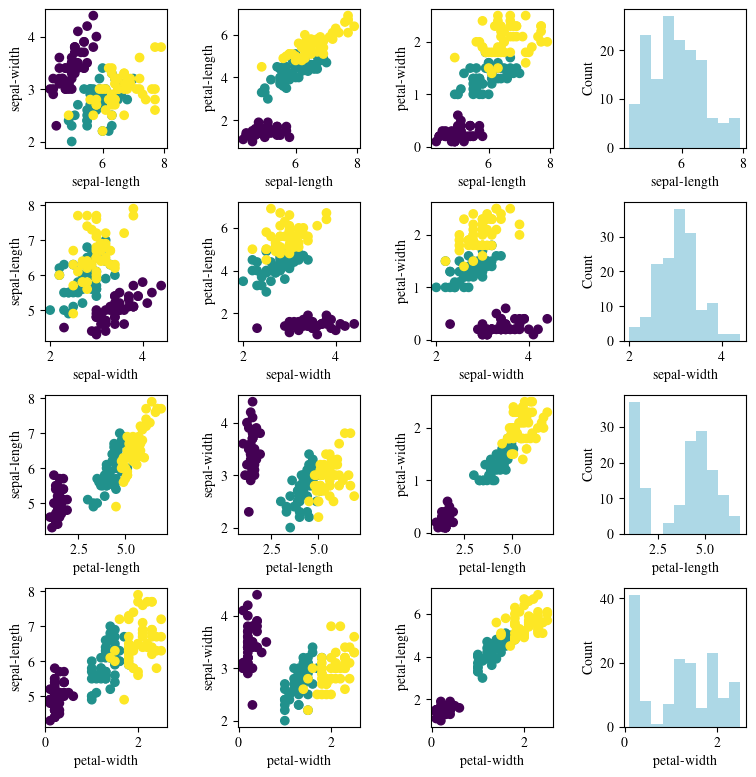

In [3]:
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (8, 8))
fig.tight_layout(pad=2.0)

names = feature_names

for i in range(n_features):
    J = np.arange(n_features)
    J = np.delete(J, i)
    for k, j in enumerate(J):
        ax[i, k].scatter(X[:, i], X[:, j], c = y)
        ax[i, k].set_xlabel(names[i])
        ax[i, k].set_ylabel(names[j])
        

for i in range(n_features):
    ax[i, -1].hist(X[:, i], color = 'lightblue')
    ax[i, -1].set_ylabel('Count')
    ax[i, -1].set_xlabel(names[i])

### Standardization

In [4]:
means  = np.mean(X, axis=0)
stdevs = np.std(X, axis=0)

X_std = (X - means) / stdevs

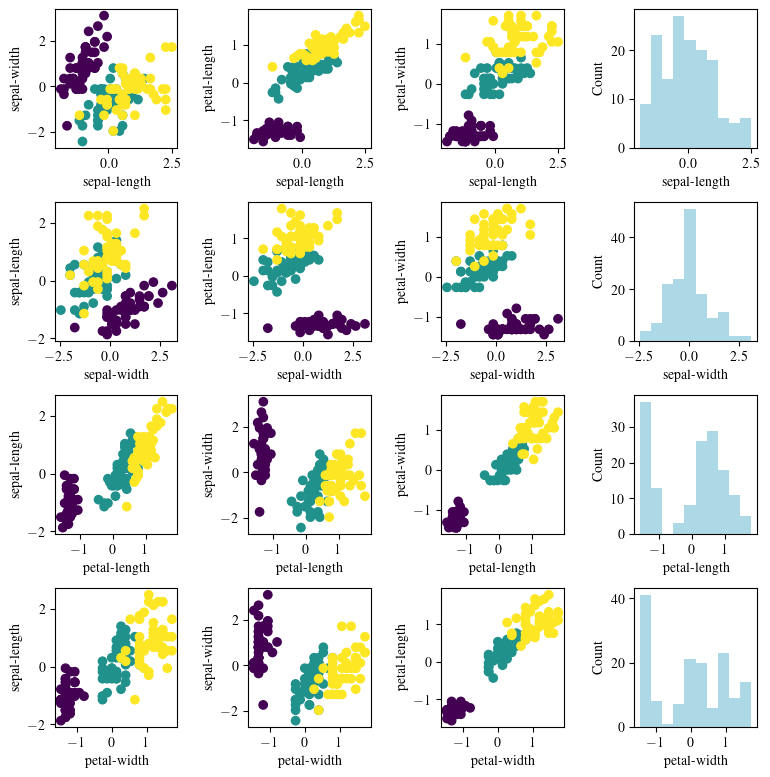

In [5]:
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (8, 8))
fig.tight_layout(pad=2.0)

names = feature_names

for i in range(n_features):
    J = np.arange(n_features)
    J = np.delete(J, i)
    for k, j in enumerate(J):
        ax[i, k].scatter(X_std[:, i], X_std[:, j], c = y)
        ax[i, k].set_xlabel(names[i])
        ax[i, k].set_ylabel(names[j])
        
for i in range(n_features):
    ax[i, -1].hist(X_std[:, i], color = 'lightblue')
    ax[i, -1].set_ylabel('Count')
    ax[i, -1].set_xlabel(names[i])

### Covariance matrix

In [6]:
cov_mat = np.cov(X_std.T) # symmetric matrix

### Singular Value Decompostion

In [7]:
U, S, Vh = np.linalg.svd(cov_mat)

eig_vals = S
eig_vecs = U

U

array([[-0.52237175, -0.37231839,  0.72101672,  0.26199553],
       [ 0.2633548 , -0.9255565 , -0.24203298, -0.12413483],
       [-0.58125407, -0.02109465, -0.14089245, -0.80115419],
       [-0.56561092, -0.06541562, -0.63380142,  0.52354641]])

### Correct the Eigen Matrix

__This section is actually optional. This step is necessary if we want to keep our results identical to PCA from scikit-learn.__

Correct the Eigen matrix such that:
* for each column, find the __largest absolute__ value
* if the __lergest absolute__ value comes from a negative value, make it positve by multiplying the entire column by -1

In [8]:
from numpy.linalg import eig

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs_ = eig_vecs*signs[np.newaxis,:]

print(eig_vals)
print(eig_vecs_)

[2.93035432 0.92740345 0.14834225 0.02074602]
[[ 0.52237175  0.37231839  0.72101672 -0.26199553]
 [-0.2633548   0.9255565  -0.24203298  0.12413483]
 [ 0.58125407  0.02109465 -0.14089245  0.80115419]
 [ 0.56561092  0.06541562 -0.63380142 -0.52354641]]


### Select the Axis Components

In [9]:
# Select top k eigenvectors
k = 2
W = eig_vecs_[:, :k] # Projection matrix
print(W)
print(W.shape)

[[ 0.52237175  0.37231839]
 [-0.2633548   0.9255565 ]
 [ 0.58125407  0.02109465]
 [ 0.56561092  0.06541562]]
(4, 2)


### Transform the Dataset

In [10]:
X_proj = X_std.dot(W)
print(X_proj.shape)

(150, 2)


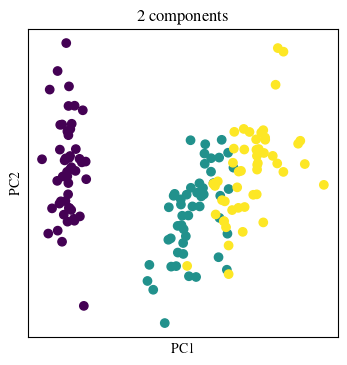

In [28]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
ax.set_xlabel('PC1'); plt.xticks([])
ax.set_ylabel('PC2'); plt.yticks([])
ax.set_title('2 components');

### Explained Variance

The optimal value for `k` can be tuned by investigating the explained variance. 

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

Explained variance: [72.77 23.03  3.68  0.52]
Cumulative explained variance: [ 72.77  95.8   99.48 100.  ]


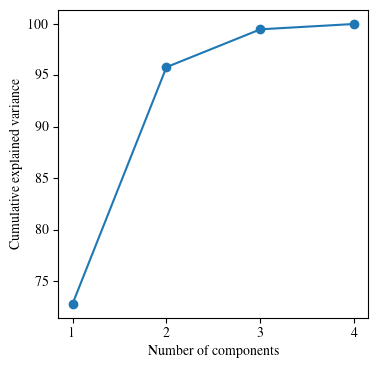

In [20]:
%matplotlib inline

eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

fig, ax = plt.subplots(figsize= (4, 4))

ax.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
ax.set_xticks(np.arange(1,n_features+1))
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance');

## References:

* https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/
* https://pure.eur.nl/ws/portalfiles/portal/95076086/Nature_Reviews_Methods_Primer_Greenacre_et_al_2022_PCA.pdf